In [6]:
setwd('/import/wangsheng.out/')

In [8]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [9]:
da1 = read.table('./count.txt',header =T,sep = '\t') %>% na.omit()

In [11]:
genele = read.table('./genelength.txt',header =T,sep = '\t')

In [13]:
merge<-merge(da1,genele,by = 'Geneid') #匹配gene_count与gene_length
dim(merge)

[1] 53700     4

In [14]:
count <- merge[,1:(dim(merge)[2]-1)]
gene_num <- dim(merge)[1]
sample_num <- dim(merge)[2]-2 #减去gene_name和gene_length列
#从第二列开始，将每个样本的count循环转化成FPKM
i <- 2

In [15]:


 
repeat{
        mapped_reads <- sum(merge[1:gene_num,i])#计算每个样本的mapped reads数
        FPKM <- merge[1:gene_num,i]/(10^-9*mapped_reads*merge[1:gene_num,dim(merge)[2]])#计算FPKM值
        FPKM <- pmax(FPKM,0)#去掉矫正带来的负值
        count = data.frame(count[1:gene_num,],FPKM)#添加到count表格后面i
        i <- i + 1
 
        if(i > sample_num+1){
        break
        }
}
 
#生成表格列名称
head(count)
count_colname <- read.table("count.txt",header = F,nrow = 1,as.is=TRUE)
FPKM_colname <- paste(count_colname[1,],"_FPKM",sep="")
FPKM_colname


,Geneid,WT_C3,WT_C4,FPKM,FPKM.1
,<chr>,<int>,<int>,<dbl>,<dbl>
1,ENSMUSG00000000001,1110,1162,9.9816412,11.37406119
2,ENSMUSG00000000003,0,0,0.0000000,0.00000000
3,ENSMUSG00000000028,66,32,0.5521982,0.29142812
4,ENSMUSG00000000031,976,923,11.6379810,11.98008730
5,ENSMUSG00000000037,4,20,0.0183420,0.09982677
6,ENSMUSG00000000049,6,0,0.1104144,0.00000000


[1] "Geneid_FPKM" "WT_C3_FPKM"  "WT_C4_FPKM"

In [17]:
FPKM_colname

[1] "Geneid_FPKM" "WT_C3_FPKM"  "WT_C4_FPKM"

In [18]:
col_name

named list()

In [19]:
colname <- c(count_colname,FPKM_colname)
col_name <- colname[-which(colname=="Geneid_FPKM")]#删除gene_FPKM
col_name
names(count) <- col_name
head(count)

$V1
[1] "Geneid"

$V2
[1] "WT_C3"

$V3
[1] "WT_C4"

[[4]]
[1] "WT_C3_FPKM"

[[5]]
[1] "WT_C4_FPKM"

,Geneid,WT_C3,WT_C4,WT_C3_FPKM,WT_C4_FPKM
,<chr>,<int>,<int>,<dbl>,<dbl>
1,ENSMUSG00000000001,1110,1162,9.9816412,11.37406119
2,ENSMUSG00000000003,0,0,0.0000000,0.00000000
3,ENSMUSG00000000028,66,32,0.5521982,0.29142812
4,ENSMUSG00000000031,976,923,11.6379810,11.98008730
5,ENSMUSG00000000037,4,20,0.0183420,0.09982677
6,ENSMUSG00000000049,6,0,0.1104144,0.00000000


In [20]:
write.csv(count,"ALL_FPKM.csv")

In [22]:
ori = read.table('./fpkm.ori.txt',header =T,sep = '\t')

In [24]:
colnames(ori)[1] = 'Geneid'

In [25]:
head(ori,2)

,Geneid,WT_C3,WT_C4
,<chr>,<dbl>,<dbl>
1,ENSMUSG00000000001,10.30823,11.76396
2,ENSMUSG00000000003,0.00000,0.00000


In [26]:
count1 =count[,c(1,4,5)]

In [28]:
data = merge(ori,count1,by = 'Geneid') %>% na.omit() 

In [32]:
rownames(data) = data[,1]

In [33]:
data =data[,-1]

In [35]:
expr =data

In [48]:
cg=names(tail(sort(apply(expr,1,sd)),5000))
n=expr[cg,]

In [49]:
colnames(data)

[1] "WT_C3"      "WT_C4"      "WT_C3_FPKM" "WT_C4_FPKM"

In [50]:
group = c(rep('WT_C3',1),rep('WT_C4',1),rep('WT_C3_FPKM',1),rep('WT_C4_FPKM',1))

In [51]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)

In [69]:
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
1,4790.7295,-2862.849,WT_C3
2,-4790.2727,2863.220,WT_C4
3,930.2512,1113.540,WT_C3_FPKM
4,-930.7081,-1113.911,WT_C4_FPKM


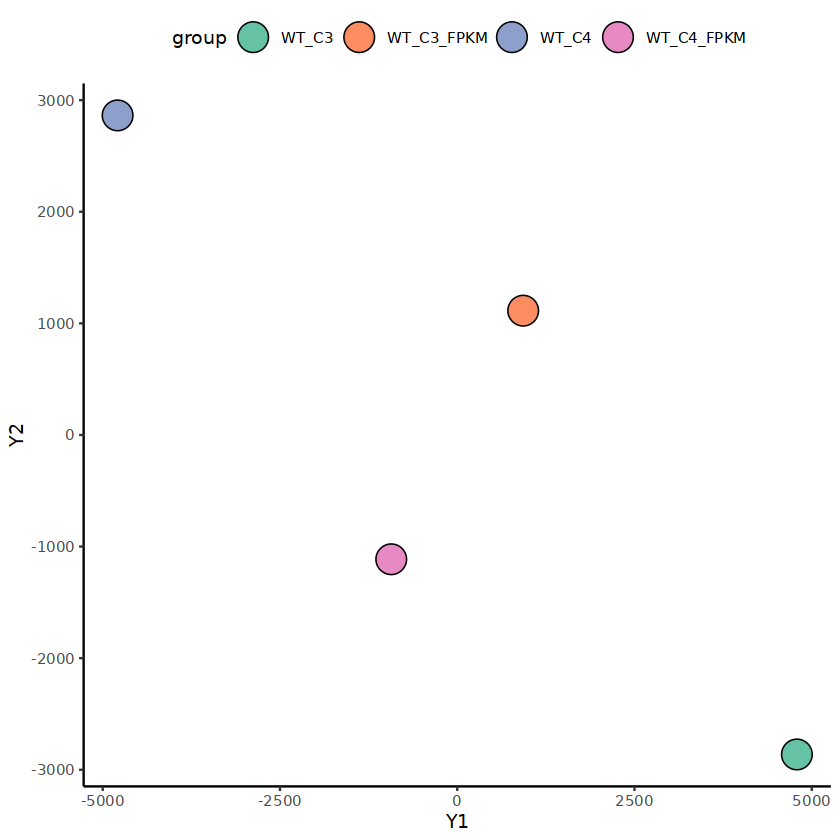

In [73]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black",size = 8)+
 
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")

In [74]:
data

,WT_C3,WT_C4,WT_C3_FPKM,WT_C4_FPKM
,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001,10.30823493,11.76395507,9.98164125,11.37406119
ENSMUSG00000000003,0.00000000,0.00000000,0.00000000,0.00000000
ENSMUSG00000000028,1.20582156,0.67394969,0.55219816,0.29142812
ENSMUSG00000000031,13.81938060,13.54720078,11.63798103,11.98008730
ENSMUSG00000000037,0.04141947,0.22426456,0.01834200,0.09982677
ENSMUSG00000000049,0.27193186,0.00000000,0.11041444,0.00000000
ENSMUSG00000000056,70.98838359,79.83944070,25.52484988,28.78048249
ENSMUSG00000000058,51.60365842,44.11682946,22.06824301,18.83223698
ENSMUSG00000000078,45.20289034,55.69176354,20.80930370,25.51604269
